# **Import Required Liberaries**

### **Importing necessary Libraries for math and plotting** 

#### For mathematical operations like sine and cosine  

In [1]:
import math

#### For plotting the magnitude and phase 

In [22]:
! pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 840.2 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/7.8 MB 840.2 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.8 MB 860.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.8 MB 853.9 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/7.8 MB 853.9 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.8 MB 860.9 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 865.2 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 865.2 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/7.8 MB 853.4 kB/s eta 0:00:08
   ---------- ----------------------------- 2.1/7.8 MB 845.2 kB/s eta 0:00:07
   ----------

In [26]:
import numpy as np
import matplotlib.pyplot as plt
print (matplotlib.__version__)

3.9.2


### **Implementing a Simple Complex Number Class**

In [5]:
class ComplexNumber :
    
    def __init__(self , real =0 , imag =0 ) :
        self.real = real  # Real Part of the complex number  
        self.imag = imag  # Imaginary part of the complex number 
    
    # Function to ADD the real and imaginary part 
    
    def __add__ (self , other) :
        # Return a new instance of ComplexNumber 
        return ComplexNumber (self.real + other.real , self.imag + other.imag)
    
    # Function to Multipliction the real and imaginary part 
    
    def __mul__ (self , other ) :
        real_part = self.real * other.real -self.imag * other.imag
        imag_part = self.real * other.imag + self.imag *other.real
        # Return a new instance of ComplexNumber
        return ComplexNumber (real_part , imag_part)
    
    # Function To Get the Magnitude of Complex Number 
    
    def magnitude (self) :
        return math.sqrt(self.real **2 + self.imag**2)
    
    # Function To Get the Phase 
    
    def phase (self) :
        return math.atan2(self.imag , self.real)
    
    # To Print the Complex number in a Friendly Way
    
    def __str__ (self) :
        return f"{self.real} + {self.imag}j"
    
    
    
    
    
       
        
        

### **Implementing the DFT Function**

In [15]:
def compute_DFT (input_signal) :
    
    Number= len (input_signal)  # Number of points in the input signal  [x(n)]
    
    DFT_result = []  # List to store the DFT results 
    
    
    # The outer loop iterates over the frequency bins (k)
    
    for k in range(Number) :
        sum_complex = ComplexNumber (0,0)  # Initialize sum as a complex number
        
        
        # The inner loop computes the summation for each bin (n)
        
        for n in range (Number) :
            
            angle = (-2 * math.pi * k * n )/ Number  # Calucate the angle 
            
            twiddle = ComplexNumber( math.cos(angle) , math.sin(angle) )  # Compute e ^ (-j * angle )
            
            sum_complex+= input_signal [n] * twiddle   # Summation for DFT 
        
        DFT_result . append (sum_complex)
    
    return DFT_result    

### **Visualizing Magnitude and Phase**

In [33]:
def plot_DFT (DFT_result) :
    
    magnitudes = [x.magnitude() for x in DFT_result]
    
    phases = [x.phase () for x in DFT_result ]
    
    frequencies = range (len(DFT_result))
    
    
    # Plot the magnitude 
    
    plt.figure (figsize=(10, 5))
    plt.subplot (1 , 2, 1)
    plt.stem (range(len(magnitudes)) , magnitudes , basefmt=" ")
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
    plt.title ("Magnitude Spectrum")
    plt.xlabel ("Frequency (k)")
    plt.ylabel ("Magnitude")
    
    # Plot phase 
    
    plt.subplot(1, 2, 2)
    plt.stem(range(len(phases)) , phases , basefmt=" ")
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
    plt.title("Phase Spectrum")
    plt.xlabel("Frequency (k)")
    plt.ylabel("Phase (radians)")
    
    plt.tight_layout ()
    plt.show()

### **Running the Problem**

#### Example usage 

- Define the input signal as a list of ComplexNumber objects 

In [16]:
input_signal = [ComplexNumber (1,0) , ComplexNumber (2 ,0) , ComplexNumber (3, 0) , ComplexNumber (4 , 0)]

- Compute the DFT

In [17]:
DFT_result = compute_DFT (input_signal)

- Print the results 

In [18]:
print ( "DFT Results :")

for i  , value in enumerate (DFT_result) :
    print (f"k = {i}: {value} (Magnitude = {value.magnitude()} , Phase = {value.phase()} radians)")

DFT Results :
k = 0: 10.0 + 0.0j (Magnitude = 10.0 , Phase = 0.0 radians)
k = 1: -2.0000000000000004 + 1.9999999999999996j (Magnitude = 2.8284271247461903 , Phase = 2.3561944901923453 radians)
k = 2: -2.0 + -9.797174393178826e-16j (Magnitude = 2.0 , Phase = -3.1415926535897927 radians)
k = 3: -1.9999999999999982 + -2.000000000000001j (Magnitude = 2.8284271247461894 , Phase = -2.3561944901923444 radians)


- Plot the results

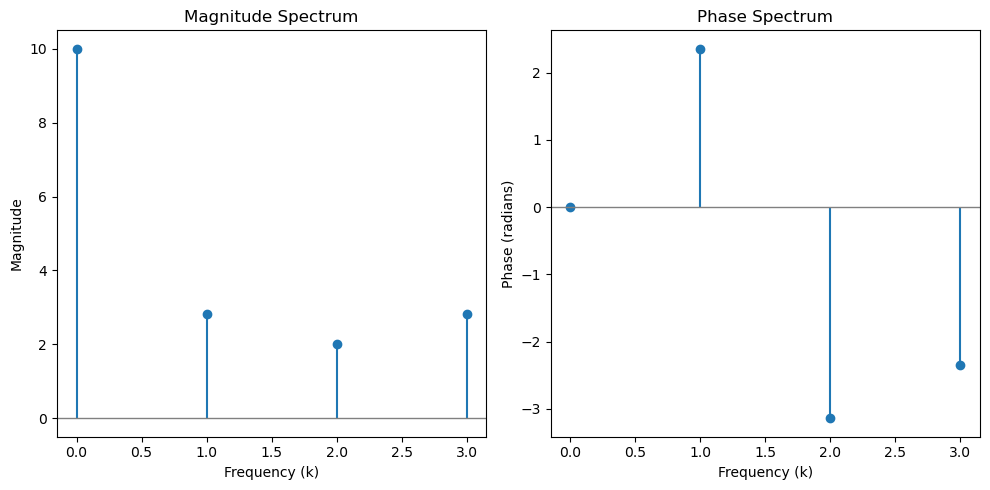

In [34]:
plot_DFT(DFT_result)